<a href="https://colab.research.google.com/github/Seanatist/Seanatist/blob/main/Multiple_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import files
files = files.upload()
df = pd.read_csv("economic index.csv")

Saving economic index.csv to economic index.csv


In [5]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [7]:
df.drop(columns= ["year","month"], axis = 1, inplace = True)

In [9]:
#checking null values
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


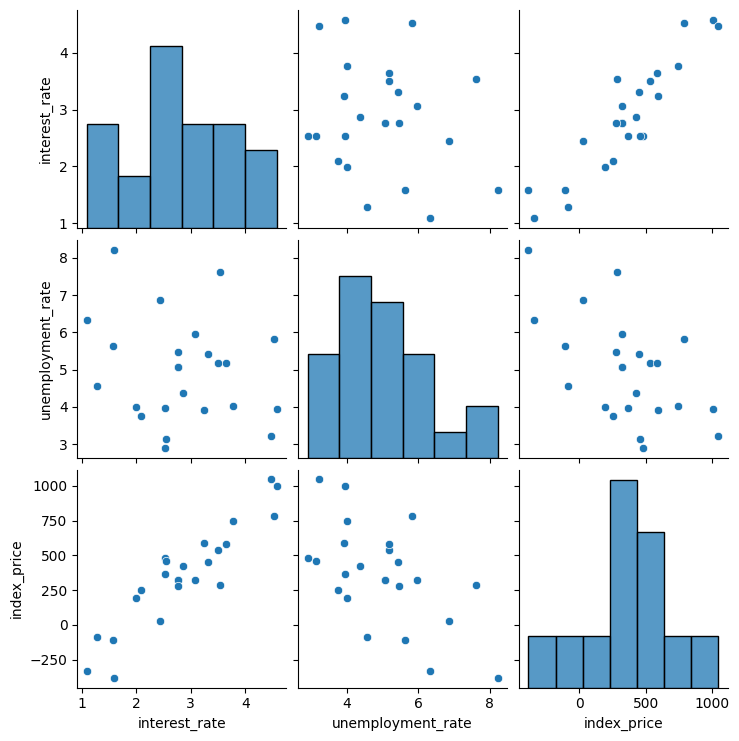

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.199148,0.917124
unemployment_rate,-0.199148,1.000000,-0.573261
index_price,0.917124,-0.573261,1.000000


Text(0, 0.5, 'unemployment rate')

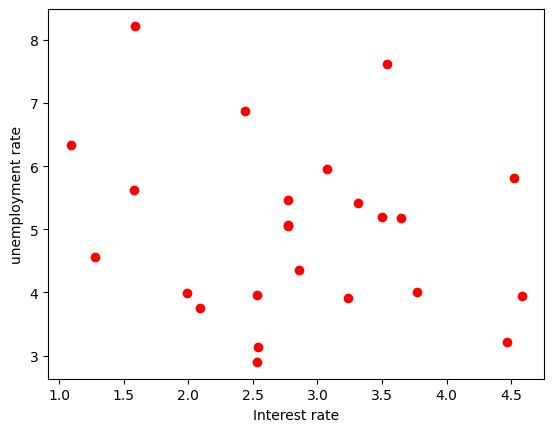

In [13]:
#visualize the datapoints more closely
plt.scatter(df["interest_rate"], df["unemployment_rate"], color = "red")
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [14]:
#independent and dependent features
x = df.iloc[:,:-1]
y = df.iloc[:,1]

In [15]:
df.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


In [16]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

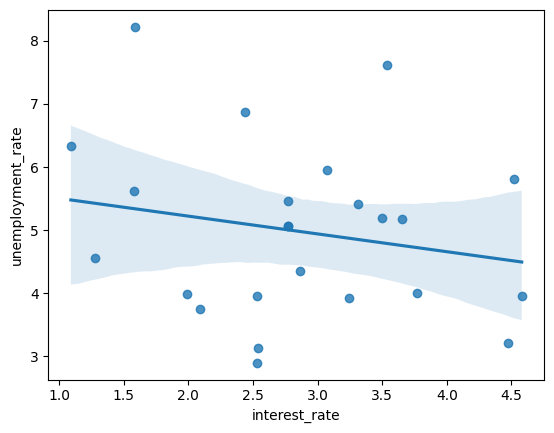

In [19]:
sns.regplot(x = df['interest_rate'],y = df["unemployment_rate"])


<Axes: xlabel='interest_rate', ylabel='index_price'>

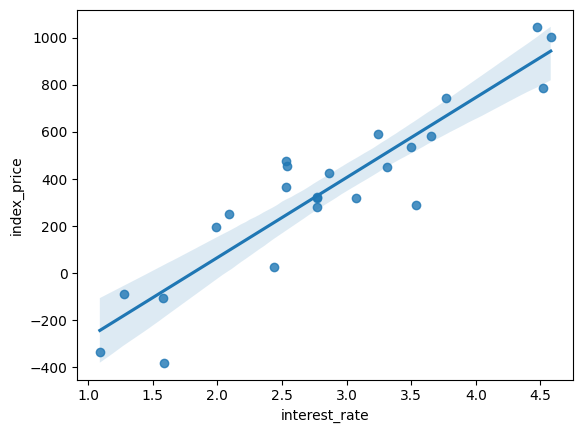

In [20]:
sns.regplot(x = df['interest_rate'],y = df["index_price"])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

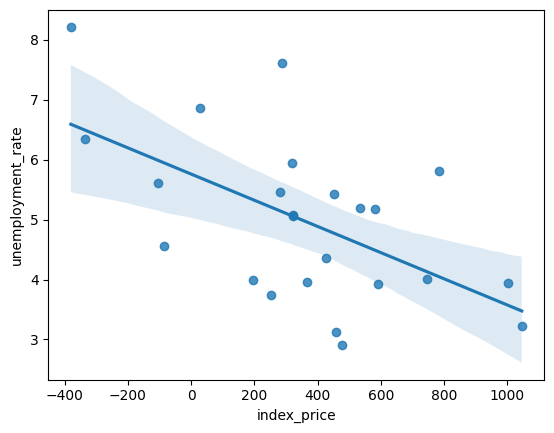

In [21]:
sns.regplot(x = df['index_price'],y = df["unemployment_rate"])

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [25]:
x_train

array([[-1.75354192,  0.97353262],
       [-0.04399952, -0.60574379],
       [-0.13092541,  0.271632  ],
       [-0.13092541, -0.04741374],
       [ 0.71901657,  0.04829998],
       [ 0.32302088, -0.9566941 ],
       [-0.44965365,  1.39626823],
       [ 1.55930012,  0.55079702],
       [-0.13092541, -0.0394376 ],
       [ 0.15882754,  0.66246303],
       [ 0.3906299 ,  0.23972742],
       [ 1.51100797, -1.51502414],
       [-1.28027877,  0.39925029],
       [ 0.83491775, -0.88490881],
       [-0.35306933, -1.58680943],
       [-1.57003171, -0.44622092],
       [-1.27062034,  2.4730476 ],
       [ 1.61725071, -0.93276567]])

In [27]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [28]:
regression.fit(x_train, y_train)

LinearRegression()

In [29]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, x_train, y_train, scoring = "neg_mean_squared_error",cv = 5)

In [30]:
np.mean(validation_score)

np.float64(-9.071900410041635e-31)

In [31]:
#prediction
y_pred = regression.predict(x_test)

In [32]:
y_pred

array([3.74307238, 4.64232046, 5.63231835, 4.44432089, 4.61757052,
       7.63706407])

In [33]:
#performance metric
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.3744517019821243
0.5511111111111092
0.6119245884764922


In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
#display adjusted R squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
)

0.8378608965907369
0.7297681609845615


Assumptions

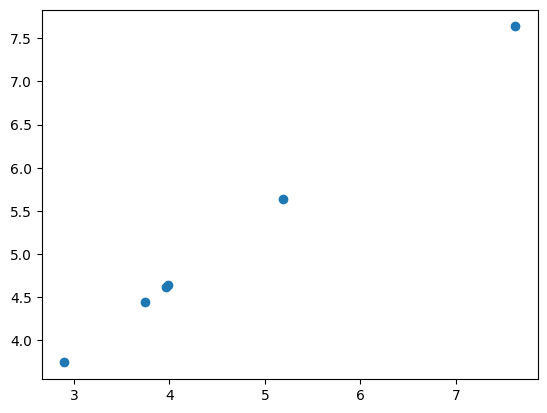

In [36]:
plt.scatter(y_test, y_pred)

In [38]:
residuals = y_test - y_pred
print(residuals)

8    -0.843072
16   -0.652320
0    -0.442318
18   -0.694321
11   -0.657571
9    -0.017064
Name: unemployment_rate, dtype: float64


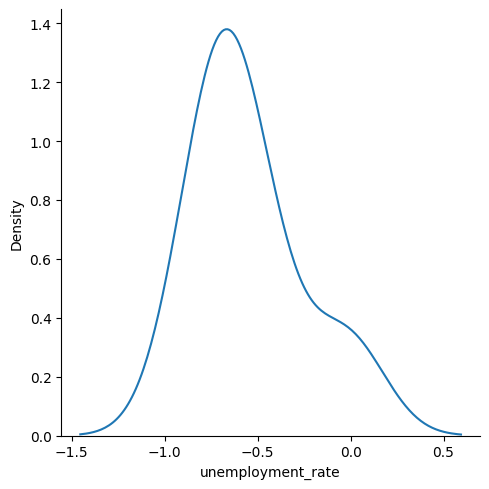

In [39]:
#plot the residuals
sns.displot(residuals, kind = "kde")

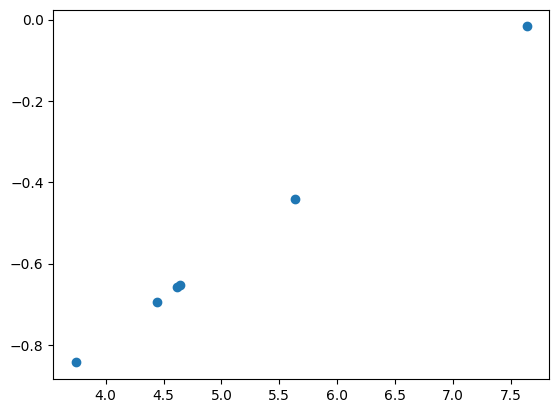

In [40]:
#scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [41]:
#Ols linear regression
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()

In [42]:
model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1687: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:1792: RuntimeWarning: Precision loss occurred in moment calculation due t

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      unemployment_rate   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):             -0.061
Method:                 Least Squares   F-statistic:                             0.4798
Date:                Thu, 06 Nov 2025   Prob (F-statistic):                       0.628
Time:                        23:03:08   Log-Likelihood:                         -54.936
No. Observations:                  18   AIC:                                      113.9
Df Residuals:                      16   BIC:                                      115.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.551e-17      1.451  -3.83e-17      1.000      -3.076       3.076
x2             1.2537      1.451      0.864      0.400      -1.822       4.329
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         1.67
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
print(regression.coef_)

[-2.86360209e-16  1.25373873e+00]
